Spectral filtering and (DCT) variance spectrum
===

Here we want to compare some fields' spectra:

* a raw field from an AROME simulation
* the same field, _*filtered with a spectral round-trip  at a lower truncation*_
* the filtered field, to which we have added a white noise
* the average spectrum of fields on the surrounding vertical levels (40:50)

In [1]:
%matplotlib inline
import numpy
import epygram
epygram.init_env()

In [2]:
r = epygram.formats.resource('../inputs/ICMSHAROM+0001', 'a')

In [3]:
t59 = r.readfield('S059TEMPERATURE')
t59.sp2gp()
sp59 = t59.dctspectrum()
sp59.name = t59.fid['FA']

In [4]:
# spectral filtering
trunc_spgeom = r.spectral_geometry.deepcopy()  # a spectral geometry is attached to a FA resource
print(trunc_spgeom.truncation['in_X'], trunc_spgeom.truncation['in_Y'])
trunc_spgeom.truncation['in_X'] = 320
trunc_spgeom.truncation['in_Y'] = 300
# spectral roundtrip
t59.gp2sp(trunc_spgeom)
t59.sp2gp()
sp59f = t59.dctspectrum()
sp59f.name = sp59.name + '(filtered)'

(374, 359)


In [5]:
# add a white noise
noise = numpy.random.normal(0, size=t59.data.shape)
t59.setdata(t59.data + noise)

In [6]:
sp59fn = t59.dctspectrum()
sp59fn.name = sp59.name + '(filtered & noised)'

In [7]:
spectra = []
for i in range(40,51):
    t = r.readfield('S0{}TEMPERATURE'.format(i))
    t.sp2gp()
    sp = t.dctspectrum()
    sp.name = t.fid['FA']
    spectra.append(sp)

In [8]:
sp_ave = spectra.pop(0)
for sp in spectra:
    sp_ave += sp
sp_ave /= len(spectra)
sp_ave.name = 'S040:50TEMPERATURE'

(<matplotlib.figure.Figure at 0x7fa238a3c410>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa2380971d0>)

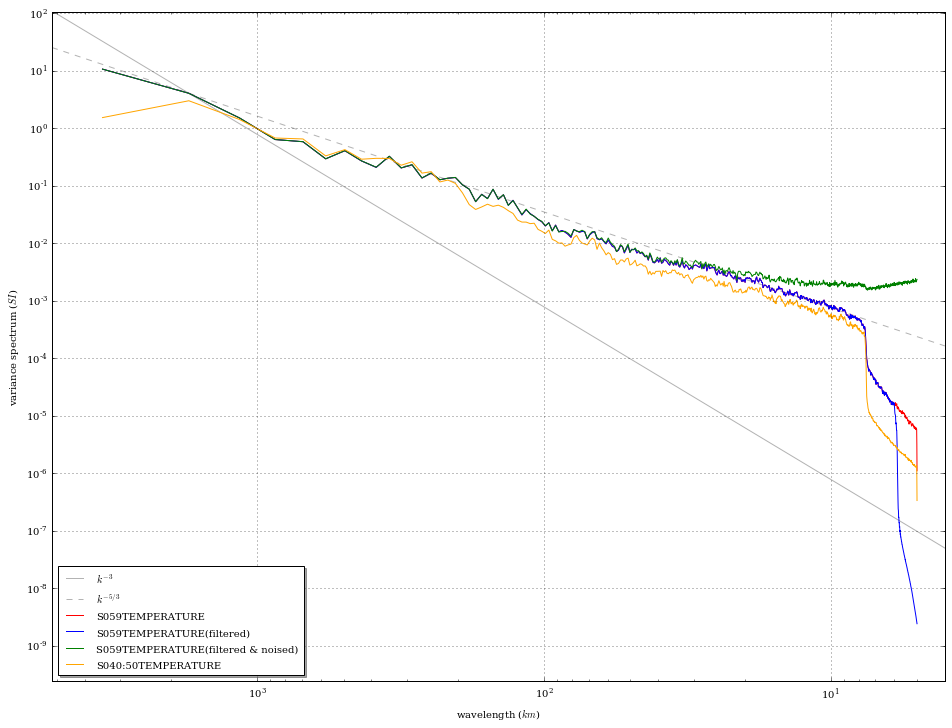

In [9]:
epygram.spectra.plotspectra([sp59, sp59f, sp59fn, sp_ave])

And finally let's get a 3rd field, truncated, with some noise added on...

In [10]:
# and write back the field to the file
t59.fid['FA'] = 'S059TEMP_NOISED'
r.writefield(t59)